<a href="https://colab.research.google.com/github/igordantasgf/analise_dados_microambientais/blob/main/graficos_radia%C3%A7%C3%A3o_bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


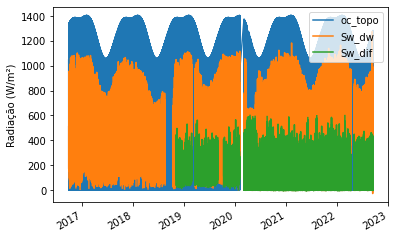

Valores NaN:
Sw_dw 18363
Sw_dif 25963
oc_topo 222


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import datetime
from sys import exit

labmim = pd.read_csv('/content/drive/MyDrive/Bolsa - Edson/estudos/código_paper_bruno/labmim_completo_2016_2022.dat',sep=';')
labmim.index = pd.to_datetime(labmim['year month day hour'.split()])

sw_dir = []
for dw, dif in zip(labmim['Sw_dw'],labmim['Sw_dif']):
    if not np.isnan(dw) and not np.isnan(dif) and dw-dif > 0:
        sw_dir.append(dw-dif)
    else:
        sw_dir.append(np.nan)


#------ filtros -------#
# filtro sw_dif errado
labmim[labmim['Sw_dif']>600] = np.nan

#filtro com mínimo número de dados


#-----------------------#
def plotar(banco):
  #panorama completo
  banco['oc_topo'].plot()
  banco['Sw_dw'].plot()
  #labmim['Sw_dir'].plot()
  banco['Sw_dif'].plot()


  plt.ylabel('Radiação (W/m²)')
  plt.legend()
  #plt.savefig('rad-panorama.png',bbox_inches='tight')
  plt.show()
  plt.close()
  print("Valores NaN:")
  print('Sw_dw',banco["Sw_dw"].isna().sum())
  print('Sw_dif',banco["Sw_dif"].isna().sum())
  print('oc_topo',banco["oc_topo"].isna().sum())
plotar(labmim)


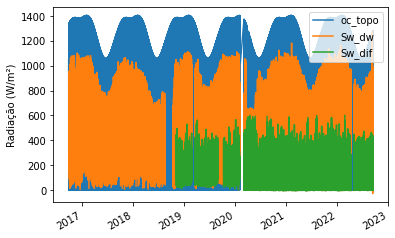

Valores NaN:
Sw_dw 18441
Sw_dif 26006
oc_topo 222


In [17]:
def zero_or_nan_values(df, column):
    # Create a new column 'date' that combines the year, month, and day columns
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

    # Group the Data Frame by the 'date' column
    grouped = df.groupby('date')

    # Iterate through each group (i.e. each day)
    for name, group in grouped:
        # Count the number of non-zero and non-NaN values in the 'Sw_dw' column
        count = group[column].count()
        # If the count is less than 8
        if count < 8:
            # Set all values in the 'Sw_dw' column for that day to NaN
            df.loc[df['date'] == name, column] = pd.np.nan
    return df

zero_or_nan_values(labmim, 'oc_topo')
zero_or_nan_values(labmim, 'Sw_dw')
zero_or_nan_values(labmim, 'Sw_dif')
plotar(labmim)

This code above creates a function called zero_or_nan_values that takes in two parameters: a DataFrame and a column name. The function creates a new column called 'date' that combines the 'year', 'month', and 'day' columns into a single date format. It then groups the Data Frame by the 'date' column, iterates through each group (i.e. each day), and counts the number of non-zero and non-NaN values in the column specified in the parameter. If the count is less than 8, it sets all values in the column for that day to NaN. The function returns the modified DataFrame.

* ## Verão

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


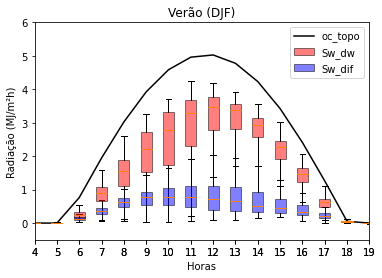

In [ ]:


###############################################################
#daily######################################################## VERAO
#topo
x = [x+1 for x in range(24)]
mm = labmim.groupby('month hour'.split())['oc_topo']
line = []
for i in range(24):
        line.append(mm.get_group((1,i)).dropna().mean())
line = plt.plot(x,np.array(line)*0.0036,color='black')

#dif     
mm = labmim.groupby('month hour'.split())['Sw_dif']
bp1 = []
for i in range(24):
    bp1.append(list(mm.get_group((1,i)).dropna().values*0.0036))
for i in range(24):
    bp1[i] += list(mm.get_group((2,i)).dropna().values*0.0036)
for i in range(24):
    bp1[i] += list(mm.get_group((12,i)).dropna().values*0.0036)



#global
mm = labmim.groupby('month hour'.split())['Sw_dw']
bp3 = []
for i in range(24):
    bp3.append(list(mm.get_group((1,i)).dropna().values*0.0036))
for i in range(24):
    bp3[i] += list(mm.get_group((2,i)).dropna().values*0.0036)
for i in range(24):
    bp3[i] += list(mm.get_group((12,i)).dropna().values*0.0036)

props_dw = plt.boxplot(bp3,labels=np.arange(0,24,1),sym='',patch_artist=True)
#props_dir = plt.boxplot(bp2,labels=np.arange(0,24,1),sym='',patch_artist=True)
props_dif = plt.boxplot(bp1,labels=np.arange(0,24,1),sym='',patch_artist=True)

for box in props_dw['boxes']:
    box.set(facecolor='red',alpha=0.5)
#for box in props_dir['boxes']:
#    box.set(facecolor='blue')
for box in props_dif['boxes']:
    box.set(facecolor='blue',alpha=0.5)

plt.legend([line[0],props_dw['boxes'][0],props_dif['boxes'][0]],['oc_topo','Sw_dw','Sw_dif'])
plt.ylabel('Radiação (MJ/m²h)')
plt.xlabel('Horas')
plt.title('Verão (DJF)')
plt.xlim(5,20)
plt.ylim(-0.5,6)

#plt.savefig('rad-hourly-verao.png',bbox_inches='tight')
plt.show()
plt.close()

* ## Inverno

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


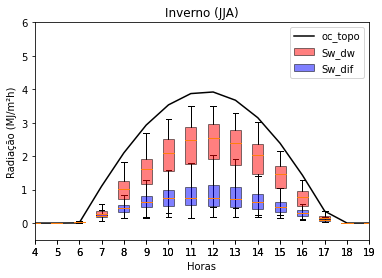

In [ ]:


#daily######################################################## INVERNO
#topo 
x = [x+1 for x in range(24)]
mm = labmim.groupby('month hour'.split())['oc_topo']
line = []
for i in range(24):
        line.append(mm.get_group((7,i)).dropna().mean())
line = plt.plot(x,np.array(line)*0.0036,color='black')

#dif     
mm = labmim.groupby('month hour'.split())['Sw_dif']
bp1 = []
for i in range(24):
    bp1.append(list(mm.get_group((6,i)).dropna().values*0.0036))
for i in range(24):
    bp1[i] += list(mm.get_group((7,i)).dropna().values*0.0036)
for i in range(24):
    bp1[i] += list(mm.get_group((8,i)).dropna().values*0.0036)


#global
mm = labmim.groupby('month hour'.split())['Sw_dw']
bp3 = []
for i in range(24):
    bp3.append(list(mm.get_group((7,i)).dropna().values*0.0036))
for i in range(24):
    bp3[i] += list(mm.get_group((7,i)).dropna().values*0.0036)
for i in range(24):
    bp3[i] += list(mm.get_group((8,i)).dropna().values*0.0036)

props_dw = plt.boxplot(bp3,labels=np.arange(0,24,1),sym='',patch_artist=True)
#props_dir = plt.boxplot(bp2,labels=np.arange(0,24,1),sym='',patch_artist=True)
props_dif = plt.boxplot(bp1,labels=np.arange(0,24,1),sym='',patch_artist=True)

for box in props_dw['boxes']:
    box.set(facecolor='red',alpha=0.5)
#for box in props_dir['boxes']:
#    box.set(facecolor='blue')
for box in props_dif['boxes']:
    box.set(facecolor='blue',alpha=0.5)

plt.legend([line[0],props_dw['boxes'][0],props_dif['boxes'][0]],['oc_topo','Sw_dw','Sw_dif'])
plt.ylabel('Radiação (MJ/m²h)')
plt.xlabel('Horas')
plt.title('Inverno (JJA)')
plt.xlim(5,20)
plt.ylim(-0.5,6)

#plt.savefig('rad-hourly-inverno.png',bbox_inches='tight')
plt.show()
plt.close()


* ## Boxplot mensal

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


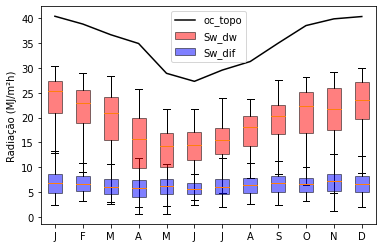

In [ ]:
####################################################
#mensal
######################################################

top = labmim.loc[labmim['oc_topo']>1].groupby('year month day'.split()).sum().reset_index().groupby('month').mean()['oc_topo']
x = [x for x in range(1,13)]
plt.plot(x,top*0.0036,color='black')

sw = labmim.groupby('year month day'.split()).sum()['Sw_dw'].reset_index().groupby('month')['Sw_dw']
dif = labmim.loc[labmim['Sw_dif']>1].groupby('year month day'.split()).sum()['Sw_dif'].reset_index().groupby('month')['Sw_dif']

bp1 = []
for i in range(1,13):
    try:
        tmp = []
        for x in sw.get_group( (i) ).dropna()*0.0036:
            if x > 0:
                tmp.append(x)
        bp1.append(np.array(tmp))
    except:
        bp1.append([])

bp2 = []
for i in range(1,13):
    try:
        bp2.append(dif.get_group( (i) ).dropna()*0.0036)
    except:
        bp2.append([])

bp3 = []
for i in range(1,13):
    try:
        bp3.append(dir.get_group( (i) ).dropna()*0.0036)
    except:
        bp3.append([])

props_dw = plt.boxplot(bp1,labels=np.arange(1,13,1),sym='',patch_artist=True)
#props_dir = plt.boxplot(bp3,labels=np.arange(1,13,1),sym='',patch_artist=True)
props_dif = plt.boxplot(bp2,labels=np.arange(1,13,1),sym='',patch_artist=True)

for box in props_dw['boxes']:
    box.set(facecolor='red',alpha=0.5)
#for box in props_dir['boxes']:
#    box.set(facecolor='blue')
for box in props_dif['boxes']:
    box.set(facecolor='blue',alpha=0.5)

plt.legend([line[0],props_dw['boxes'][0],props_dif['boxes'][0]],['oc_topo','Sw_dw','Sw_dif'])
plt.ylabel('Radiação (MJ/m²h)')
plt.xticks(range(1,13),'J F M A M J J A S O N D'.split())

#plt.savefig('rad-monthly.png',bbox_inches='tight')
plt.show()
plt.close()

# Dados do modelo WRF

* Importando dados e colunas

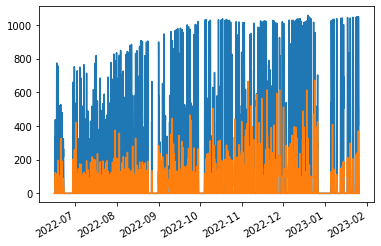

In [40]:
series = pd.read_csv('/content/drive/MyDrive/Bolsa - Edson/estudos/código_paper_bruno/series_operacional', sep=',')
series.index = pd.to_datetime(series['year month day hour'.split()])
series['Swdw'].plot()
series['Swdf'].plot()